In [537]:
import sys
sys.path.append('../')

import pickle

folder = '/local/scratch_2/jls/virac_classifier/variable/edr3_EAEB/'
with open(folder+'variable_classifier.pkl', 'rb') as f:
    var = pickle.load(f)
with open(folder+'variable_training_set.pkl', 'rb') as f:
    var_dataset_scaled = pickle.load(f)
with open(folder+'variable_features_total.pkl', 'rb') as f:
    var_dataset_full = pickle.load(f)
with open(folder+'variable_features_mira.pkl', 'rb') as f:
    mira_features = pickle.load(f)
var_dataset_full = pd.concat([var_dataset_full, mira_features], axis=0)
var_dataset = var_dataset_full.merge(var_dataset_scaled[['sourceid', 'class', 'prob']], on='sourceid')
var_dataset_full = var_dataset_full[(~var_dataset_full['error'])].reset_index(drop=True)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [538]:
np.count_nonzero(var_dataset['class']=='LPV')

384

In [ ]:
var_dataset['sourceid']

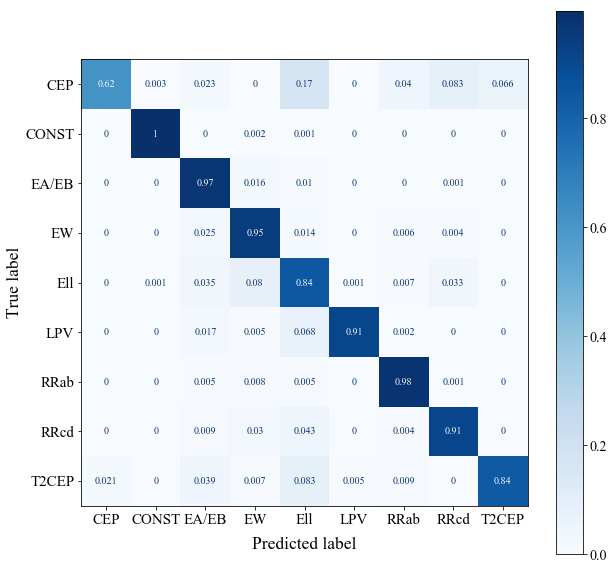

In [529]:
from initial_classif.classifier.classifier import ConfusionMatrixDisplay
displ = ConfusionMatrixDisplay(confusion_matrix=np.around(var.cm/np.nansum(var.cm,axis=1)[:,np.newaxis], decimals=3),
                                       display_labels=['CEP', 'CONST', 'EA/EB', 'EW', 'Ell', 'LPV', 'RRab', 'RRcd', 'T2CEP'])
disp = displ.plot(include_values=True, cmap=plt.cm.Blues, 
                  ax=None, xticks_rotation='horizontal',
                  values_format=None)

fig = disp.figure_
ax = disp.ax_
im = disp.im_
fig.set_size_inches(10,10)
ax.set_xlabel('Predicted label',family='serif', fontsize=17.5, labelpad=10)
ax.set_ylabel('True label',family='serif', fontsize=17.5, labelpad=2)
#ax.tick_params(labelsize=15)
import matplotlib
ticks_font = matplotlib.font_manager.FontProperties(family='serif',
                                                            style='normal', size=15,
                                                            weight='normal', stretch='normal')
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

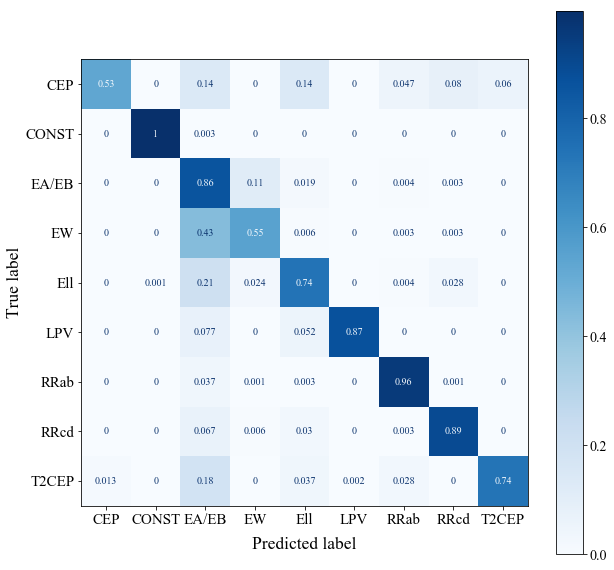

In [2]:
from initial_classif.classifier.classifier import ConfusionMatrixDisplay
displ = ConfusionMatrixDisplay(confusion_matrix=np.around(var.cm/np.nansum(var.cm,axis=1)[:,np.newaxis], decimals=3),
                                       display_labels=['CEP', 'CONST', 'EA/EB', 'EW', 'Ell', 'LPV', 'RRab', 'RRcd', 'T2CEP'])
disp = displ.plot(include_values=True, cmap=plt.cm.Blues, 
                  ax=None, xticks_rotation='horizontal',
                  values_format=None)

fig = disp.figure_
ax = disp.ax_
im = disp.im_
fig.set_size_inches(10,10)
ax.set_xlabel('Predicted label',family='serif', fontsize=17.5, labelpad=10)
ax.set_ylabel('True label',family='serif', fontsize=17.5, labelpad=2)
#ax.tick_params(labelsize=15)
import matplotlib
ticks_font = matplotlib.font_manager.FontProperties(family='serif',
                                                            style='normal', size=15,
                                                            weight='normal', stretch='normal')
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

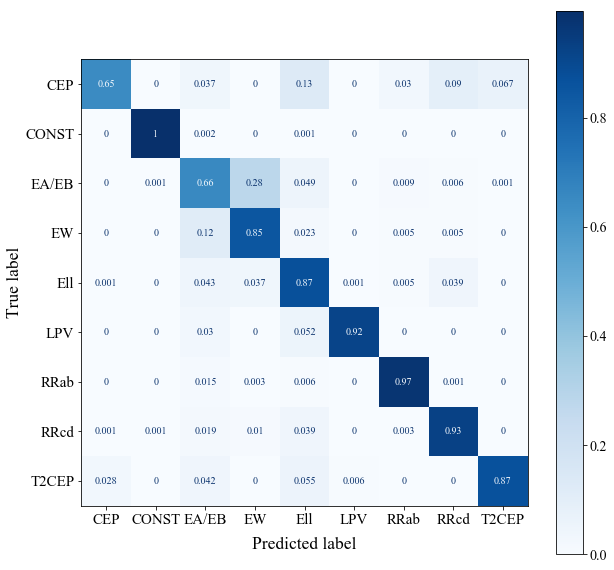

In [539]:
from initial_classif.classifier.classifier import ConfusionMatrixDisplay
displ = ConfusionMatrixDisplay(confusion_matrix=np.around(var.cm/np.nansum(var.cm,axis=1)[:,np.newaxis], decimals=3),
                                       display_labels=['CEP', 'CONST', 'EA/EB', 'EW', 'Ell', 'LPV', 'RRab', 'RRcd', 'T2CEP'])
disp = displ.plot(include_values=True, cmap=plt.cm.Blues, 
                  ax=None, xticks_rotation='horizontal',
                  values_format=None)

fig = disp.figure_
ax = disp.ax_
im = disp.im_
fig.set_size_inches(10,10)
ax.set_xlabel('Predicted label',family='serif', fontsize=17.5, labelpad=10)
ax.set_ylabel('True label',family='serif', fontsize=17.5, labelpad=2)
#ax.tick_params(labelsize=15)
import matplotlib
ticks_font = matplotlib.font_manager.FontProperties(family='serif',
                                                            style='normal', size=15,
                                                            weight='normal', stretch='normal')
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

In [566]:
for ii in np.unique(var_dataset_scaled['class']):
    print(ii,'P:',np.count_nonzero((var_dataset_scaled['class']==ii)&(var_dataset_scaled['var_class']==ii))/(
        np.count_nonzero((var_dataset_scaled['class']==ii)&(var_dataset_scaled['var_class']==ii))+
        np.count_nonzero((var_dataset_scaled['class']==ii)&(var_dataset_scaled['var_class']!=ii))),'R:',
    np.count_nonzero((var_dataset_scaled['class']==ii)&(var_dataset_scaled['var_class']==ii))/(
        np.count_nonzero((var_dataset_scaled['class']==ii)&(var_dataset_scaled['var_class']==ii))+
        np.count_nonzero((var_dataset_scaled['class']!=ii)&(var_dataset_scaled['var_class']==ii))))

CEP P: 0.8016528925619835 R: 0.6466666666666666
CONST P: 0.9974136928978263 R: 0.9963424192284246
EA/EB P: 0.9268874653110979 R: 0.6549799774574578
EW P: 0.5224342206493306 R: 0.8515072478306666
Ell P: 0.591626213592233 R: 0.8739691645751165
LPV P: 0.8789473684210526 R: 0.9175824175824175
RRab P: 0.9466244634262672 R: 0.9752088265511234
RRcd P: 0.8140882159315339 R: 0.9279603782080144
T2CEP P: 0.8047538200339559 R: 0.8697247706422019


In [567]:
sorted(var.feature_importance.items(), key=lambda x:x[1])[::-1]

[('log10_fap', 0.13222241),
 ('lsq_period', 0.0843076),
 ('amp_double_3', 0.0531833),
 ('amp_double_1', 0.051321957),
 ('ks_p75_p25', 0.03763716),
 ('amplitude', 0.035442803),
 ('phi3_phi1_double_y', 0.033864588),
 ('ks_p75_p25_over_error', 0.030409921),
 ('max_pow', 0.024876613),
 ('ks_mad_over_error', 0.024542721),
 ('amp_0', 0.024343368),
 ('ks_p95_p5', 0.024232166),
 ('JK_col', 0.024076844),
 ('pow_mean_disp', 0.021056375),
 ('amp_double_0', 0.021038594),
 ('ks_mad', 0.015276525),
 ('a0_a3_double', 0.013840815),
 ('amp_1', 0.013840369),
 ('phi1_phi0_y', 0.01270159),
 ('ks_p84_p16', 0.012228639),
 ('ks_p84_p16_over_error', 0.011283213),
 ('a1_a3_double', 0.011134299),
 ('peak_ratio_model', 0.009925162),
 ('phi1_phi0_x', 0.009847479),
 ('a0_a1', 0.00952991),
 ('a0_a2', 0.009181605),
 ('a0_a1_double', 0.008092079),
 ('Z_model', 0.0075939577),
 ('HK_col', 0.0074078697),
 ('J_model', 0.0072382237),
 ('ks_stetson_i', 0.0070020654),
 ('a1_a2_double', 0.006794932),
 ('delta_loglik', 0.0067

In [28]:
import sys
sys.path.append('../')
from config import configuration
config = configuration()
config.request_password()

 ·············


In [51]:
import sqlutilpy
def get_lightcurve(sourceid):

    lcs = pd.DataFrame(sqlutilpy.get('''select sourceid, 
                                unnest(mjdobs) as mjdobs,
                                unnest(mag) as mag,
                                unnest(emag) as emag,
                                unnest(filterid) as filterid,
                                unnest(chi) as chi,
                                unnest(ast_res_chisq) as ast_res_chisq,
                                unnest(ambiguous_match) as ambiguous_match  
                                from leigh_smith.virac2_ts_tmolnar_variables where sourceid={0}'''.format(sourceid),
                     **config.wsdb_kwargs))
    
    return lcs

def get_lightcurve_bulk(sourceids):

    lcs = pd.DataFrame(sqlutilpy.get('''select sourceid, 
                                unnest(mjdobs) as mjdobs,
                                unnest(mag) as mag,
                                unnest(emag) as emag,
                                unnest(filterid) as filterid,
                                unnest(chi) as chi,
                                unnest(ast_res_chisq) as ast_res_chisq,
                                unnest(ambiguous_match) as ambiguous_match  
                                from leigh_smith.virac2_ts_tmolnar_variables where sourceid in ({0})'''.format((','.join(str(s) for s in sourceids))),
                     **config.wsdb_kwargs))
    
    return [x.reset_index(drop=True) for _, x in lcs.groupby('sourceid')]

import seaborn as sns
def plllt(lc,period,color=sns.color_palette()[0],cla=True):
    clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<13.)
    min_t = lc['mjdobs'][clean].values[np.argsort(lc['mag'][clean].values)[-5]]
    plt.plot(((lc['mjdobs'][clean]-min_t)%(period)/period),lc['mag'][clean]-np.nanmedian(lc['mag'][clean]),'.',
            ms=3,color=color)
    plt.gca().invert_yaxis()
#     plt.gca().set_facecolor('white')

In [433]:
def clean_lc(lc):
    if len(lc)==0:
        return pd.DataFrame()
    
    clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<13.)&(lc['mag']>0.)&(lc['mjdobs']>0.)
    
    return lc[clean].reset_index(drop=True)

def symmetry(lc,period,Npoints=5):
    min_t = lc['mjdobs'].values[np.argsort(lc['mag'].values)[-5]]
    phases = ((lc['mjdobs'].values-min_t)%(period)/period)
    
    sphases = np.argsort(phases)
    neg_phases = 1-phases[sphases]
    mag = (lc['mag'].values-np.nanmedian(lc['mag'].values))[sphases]
    err = (lc['emag'].values)[sphases]
    phases = phases[sphases]
    
    distances = np.abs(phases[:,np.newaxis] - neg_phases[np.newaxis,:])
    distances[distances>0.5] = 1-distances[distances>0.5]
    srrt = np.argsort(distances, axis=1)[:,:Npoints]
    
    distances_ = np.abs(phases[:,np.newaxis] - phases[np.newaxis,:])
    distances_[distances_>0.5] = 1-distances_[distances_>0.5]
    srrt_ = np.argsort(distances_, axis=1)[:,1:Npoints]
    
    scatter_neg = (mag-np.nanmean(mag[srrt]/err[srrt]**2,axis=1)/np.nanmean(1./err[srrt]**2,axis=1))**2
    scatter_pos = (mag-np.nanmean(mag[srrt_]/err[srrt_]**2,axis=1)/np.nanmean(1./err[srrt_]**2,axis=1))**2
    
    return np.sqrt(np.nanmean(scatter_neg/err**2)/np.nanmean(scatter_pos/err**2))

def percentile_diff(lc,period,pct=np.array([5.,16.,25.,50.,75.,84.,95.]),Npoints=5):
    
    min_t = lc['mjdobs'].values[np.argsort(lc['mag'].values)[-5]]
    phases = ((lc['mjdobs'].values-min_t)%(period)/period)
    
    sphases = np.argsort(phases)
    mag = (lc['mag'].values-np.nanmedian(lc['mag'].values))[sphases]
    err = (lc['emag'].values)[sphases]
    phases = phases[sphases]
    
    distances = np.abs(phases[:,np.newaxis] - np.concatenate([[0.],pct])[np.newaxis,:]/100.)
    distances[distances>0.5] = 1-distances[distances>0.5]
    srrt = np.argsort(distances, axis=0)[:Npoints,:]
    mean_b = np.nanmean(mag[srrt]/err[srrt]**2,axis=0)/np.nanmean(1./err[srrt]**2,axis=0)

    return (mean_b[1:]-mean_b[0])/np.diff(np.nanpercentile(mag,[95.,5.]))
    

44


array([ 0.36954796,  0.66231033,  0.60201723, -0.03011286,  0.5973757 ,
        0.20403171, -0.20640373])

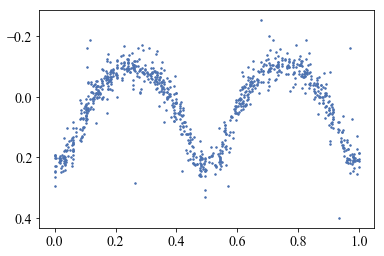

In [510]:
ii=20
fltr = (var_dataset['class']=='EW')&(var_dataset['var_class']=='EA/EB')&(var_dataset['prob']>0.8)&(var_dataset['n_epochs']>100)
print(np.count_nonzero(fltr))
sid=var_dataset['sourceid'][fltr].values[ii]
per=var_dataset['lsq_period'][fltr].values[ii]
lcc = get_lightcurve(sid)
plllt(lcc,per)
np.log10(symmetry(clean_lc(lcc),per))
percentile_diff(clean_lc(lcc),per)

array([ 0.77850203,  0.84129398,  0.84482145,  0.67015503,  0.28449551,
        0.1968963 , -0.09146667])

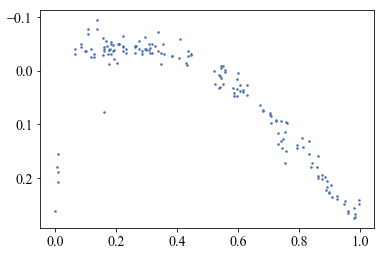

In [435]:
ii=80
fltr = (var_dataset['class']=='RRab')&(var_dataset['var_class']=='RRab')&(var_dataset['prob']>0.95)&(var_dataset['n_epochs']>100)

sid=var_dataset['sourceid'][fltr].values[ii]
per=var_dataset['lsq_period'][fltr].values[ii]
lcc = get_lightcurve(sid)
plllt(lcc,per)
np.log10(symmetry(clean_lc(lcc),per))
percentile_diff(clean_lc(lcc),per)

In [444]:
ii=3
fltr = (var_dataset['class']=='EW')&(var_dataset['var_class']=='EW')&(var_dataset['prob']>0.75)&(var_dataset['n_epochs']>100)
print(np.count_nonzero(fltr))
ll=50
gg5_P = np.zeros((ll,7))*np.nan
for ii in range(ll):
    sid=var_dataset['sourceid'][fltr].values[ii]
    per=var_dataset['lsq_period'][fltr].values[ii]
    lcc = clean_lc(get_lightcurve(sid))
    if len(lcc)==0:
        continue
#     plllt(lcc,per)
    gg5_P[ii]=percentile_diff(lcc,per)

36471


In [441]:
ii=3
fltr = (var_dataset['class']=='EA/EB')&(var_dataset['var_class']=='EW')&(var_dataset['prob']>0.75)&(var_dataset['n_epochs']>100)
print(np.count_nonzero(fltr))
ll=50
gg4_P = np.zeros((ll,7))*np.nan
for ii in range(ll):
    sid=var_dataset['sourceid'][fltr].values[ii]
    per=var_dataset['lsq_period'][fltr].values[ii]
    lcc = clean_lc(get_lightcurve(sid))
    if len(lcc)==0:
        continue
#     plllt(lcc,per)
    gg4_P[ii]=percentile_diff(lcc,per)

461


In [436]:
ii=3
fltr = (var_dataset['class']=='EW')&(var_dataset['var_class']=='EA/EB')&(var_dataset['prob']>0.75)&(var_dataset['n_epochs']>100)
print(np.count_nonzero(fltr))
ll=50
gg3_P = np.zeros((ll,7))*np.nan
for ii in range(ll):
    sid=var_dataset['sourceid'][fltr].values[ii]
    per=var_dataset['lsq_period'][fltr].values[ii]
    lcc = clean_lc(get_lightcurve(sid))
    if len(lcc)==0:
        continue
#     plllt(lcc,per)
    gg3_P[ii]=percentile_diff(lcc,per)

74


In [437]:
ii=3
fltr = (var_dataset['class']=='EA/EB')&(var_dataset['var_class']=='EA/EB')&(var_dataset['prob']>0.95)&(var_dataset['n_epochs']>100)
print(np.count_nonzero(fltr))
ll=50
gg2_P = np.zeros((ll,7))*np.nan
for ii in range(ll):
    sid=var_dataset['sourceid'][fltr].values[ii]
    per=var_dataset['lsq_period'][fltr].values[ii]
    lcc = clean_lc(get_lightcurve(sid))
    if len(lcc)==0:
        continue
#     plllt(lcc,per)
    gg2_P[ii]=percentile_diff(lcc,per)

21681


In [438]:
ii=3
fltr = (var_dataset['class']=='RRab')&(var_dataset['var_class']=='RRab')&(var_dataset['prob']>0.95)&(var_dataset['n_epochs']>100)
print(np.count_nonzero(fltr))
ll=50
gg_P = np.zeros((ll,7))*np.nan
for ii in range(ll):
    sid=var_dataset['sourceid'][fltr].values[ii]
    per=var_dataset['lsq_period'][fltr].values[ii]
    lcc = clean_lc(get_lightcurve(sid))
    if len(lcc)==0:
        continue
#     plllt(lcc,per)
    gg_P[ii]=percentile_diff(lcc,per)

20658


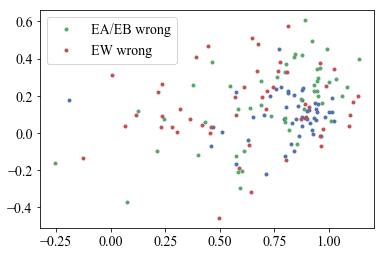

In [465]:
# plt.plot(gg2_P[:,1],gg2_P[:,-2],'.',label='EA/EB correct')
plt.plot(gg_P[:,2] ,gg_P[:,-1],'.')
plt.plot(gg3_P[:,2] ,gg3_P[:,-1],'.',label='EA/EB wrong')
plt.plot(gg4_P[:,2] ,gg4_P[:,-1],'.',label='EW wrong')
# plt.plot(gg5_P[:,1] ,gg5_P[:,-2],'.',label='EW correct')
plt.legend()

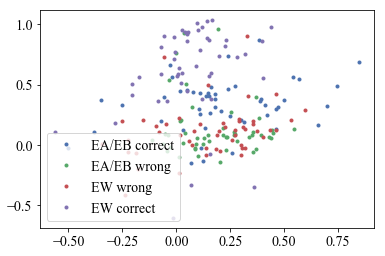

In [466]:
plt.plot(gg2_P[:,0],gg2_P[:,3],'.',label='EA/EB correct')
# plt.plot(gg_P[:,0] ,gg_P[:,3],'.')
plt.plot(gg3_P[:,0] ,gg3_P[:,3],'.',label='EA/EB wrong')
plt.plot(gg4_P[:,0] ,gg4_P[:,3],'.',label='EW wrong')
plt.plot(gg5_P[:,0] ,gg5_P[:,3],'.',label='EW correct')
plt.legend()

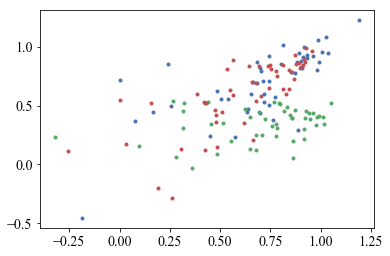

In [440]:
plt.plot(gg2_P[:,1],gg2_P[:,-2],'.')
plt.plot(gg_P[:,1] ,gg_P[:,-2],'.')
plt.plot(gg3_P[:,1] ,gg3_P[:,-2],'.')

In [326]:
ii=3
fltr = (var_dataset['class']=='EW')&(var_dataset['var_class']=='EW')&(var_dataset['prob']>0.95)&(var_dataset['n_epochs']>100)
print(np.count_nonzero(fltr))
ll=500
gg2 = np.zeros(ll)*np.nan
for ii in range(ll):
    sid=var_dataset['sourceid'][fltr].values[ii]
    per=var_dataset['lsq_period'][fltr].values[ii]
    lcc = clean_lc(get_lightcurve(sid))
    if len(lcc)==0:
        continue
#     plllt(lcc,per)
    gg2[ii]=symmetry(lcc,per)

33917


In [327]:
ii=3
fltr = (var_dataset['class']=='RRab')&(var_dataset['var_class']=='RRab')&(var_dataset['prob']>0.95)&(var_dataset['n_epochs']>100)
print(np.count_nonzero(fltr))
ll=500
gg = np.zeros(ll)
for ii in range(ll):
    sid=var_dataset['sourceid'][fltr].values[ii]
    per=var_dataset['lsq_period'][fltr].values[ii]
    lcc = clean_lc(get_lightcurve(sid))
    if len(lcc)==0:
        continue
#     plllt(lcc,per)
    gg[ii]=symmetry(lcc,per)

20658


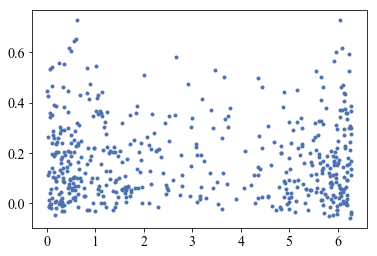

In [357]:
fltr = (var_dataset['class']=='EW')&(var_dataset['var_class']=='EW')&(var_dataset['prob']>0.95)&(var_dataset['n_epochs']>100)
plt.plot(((var_dataset['phi_2']-3*var_dataset['phi_0'])%(2.*np.pi))[fltr].values[:ll],
         np.log10(gg2),'.')

/data/jls/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


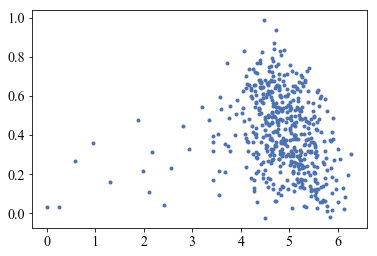

In [356]:
fltr = (var_dataset['class']=='RRab')&(var_dataset['var_class']=='RRab')&(var_dataset['prob']>0.95)&(var_dataset['n_epochs']>100)
plt.plot(((var_dataset['phi_2']-3*var_dataset['phi_0'])%(2.*np.pi))[fltr].values[:ll],
         np.log10(gg),'.')

/data/jls/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


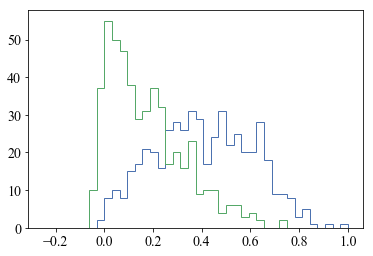

In [328]:
plt.hist(np.log10(gg),histtype='step',range=[-0.25,1],bins=40)
plt.hist(np.log10(gg2),histtype='step',range=[-0.25,1],bins=40);